In [0]:
#to Calc Google Stock on a Specf day.using SVR.and LR

In [0]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [9]:
#loading Data of Google.
from google.colab import files
uploaded =files.upload()
df = pd.read_csv('GOOG_30_days.csv')#data frame
df.head(7)

Saving GOOG_30_days.csv to GOOG_30_days (1).csv


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-03,1065.500000,1065.500000,1025.000000,1036.229980,1036.229980,5130600
1,2019-06-04,1042.900024,1056.050049,1033.689941,1053.050049,1053.050049,2833500
2,2019-06-05,1051.540039,1053.550049,1030.489990,1042.219971,1042.219971,2168400
3,2019-06-06,1044.989990,1047.489990,1033.699951,1044.339966,1044.339966,1703200
4,2019-06-07,1050.630005,1070.920044,1048.400024,1066.040039,1066.040039,1802400
5,2019-06-10,1072.979980,1092.660034,1072.322021,1080.380005,1080.380005,1464200
6,2019-06-11,1093.979980,1101.989990,1077.603027,1078.719971,1078.719971,1436700


In [0]:
dates = []
prices = []


In [10]:
df.shape

(20, 7)

In [11]:
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
19,2019-06-28,1076.390015,1081.0,1073.369995,1080.910034,1080.910034,1693200


In [12]:
#get Data Except Last Row
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-03,1065.500000,1065.500000,1025.000000,1036.229980,1036.229980,5130600
1,2019-06-04,1042.900024,1056.050049,1033.689941,1053.050049,1053.050049,2833500
2,2019-06-05,1051.540039,1053.550049,1030.489990,1042.219971,1042.219971,2168400
3,2019-06-06,1044.989990,1047.489990,1033.699951,1044.339966,1044.339966,1703200
4,2019-06-07,1050.630005,1070.920044,1048.400024,1066.040039,1066.040039,1802400
5,2019-06-10,1072.979980,1092.660034,1072.322021,1080.380005,1080.380005,1464200
6,2019-06-11,1093.979980,1101.989990,1077.603027,1078.719971,1078.719971,1436700
7,2019-06-12,1078.000000,1080.930054,1067.540039,1077.030029,1077.030029,1061000
8,2019-06-13,1083.640015,1094.170044,1080.150024,1088.770020,1088.770020,1057700
9,2019-06-14,1086.420044,1092.689941,1080.171997,1085.349976,1085.349976,1111500


In [13]:
df.shape

(19, 7)

In [0]:
#Get ROws from Date
df_dates = df.loc[:,'Date']
# get Open COlumn
df_open = df.loc[:,"Open"]

In [0]:
#creating the independant Data set X
for date in df_dates:
  dates.append([int(date.split("-")[2])])

#Creating Dependant DataSet . i.e  Y
for open_price in df_open:
  prices.append(float(open_price))


In [22]:
print(dates)

[[3], [4], [5], [6], [7], [10], [11], [12], [13], [14], [17], [18], [19], [20], [21], [24], [25], [26], [27]]


In [0]:
def predict_price(dates,prices,x):
  #Create SVM
  svr_lin = SVR(kernel="linear",C= 1e3)
  svr_poly = SVR(kernel="poly",C=1e3,degree=2)
  svr_rbf = SVR(kernel="rbf",C=1e3,gamma=0.1)

  #training Models
  svr_lin.fit(dates,prices)
  svr_poly.fit(dates,prices)
  svr_rbf.fit(dates,prices)

  #creating Linear Regrssion models
  lin_reg=LinearRegression()

  #train it
  lin_reg.fit(dates,prices)


  #plotting models dates on x and predection on y (price)

  plt.scatter(dates,prices,color="black",label='Data')
  plt.plot(dates ,svr_rbf.predict(dates),color='red',label='SVR RBF')
  plt.plot(dates, svr_poly.predict(dates),color='blue',label='SVR Poly')
  plt.plot(dates, svr_lin.predict(dates),color='orange',label='SVR Linear')
  plt.plot(dates, lin_reg.predict(dates),color='green',label='Linear Regression')
  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.title('Regression')
  plt.legend()
  plt.show()
  return svr_rbf.predict(x)[0],svr_lin.predict(x)[0],svr_poly.predict(x)[0],svr_rbf.predict(x)[0]

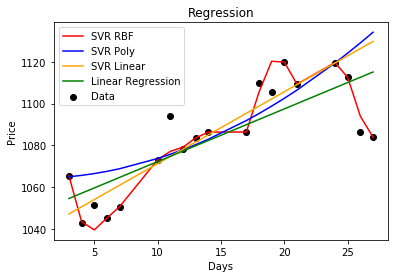

(1091.7058004910944, 1133.3133133337788, 1139.5478482146918, 1091.7058004910944)


In [36]:
# Predicting The price
predicted_price = predict_price(dates,prices,[[28]])
print(predicted_price)